 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [6]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
whale_returns = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [8]:
# Count nulls
whale_returns_df.isnull()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [9]:
# Drop nulls
whale_returns_df_copy = whale_returns_df.dropna()
whale_returns_df_copy

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_returns = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns_df_copy = algo_returns_df.dropna()
algo_returns_df_copy

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp_returns = Path("../Starter_Code/Resources/sp500_history.csv")
sp_returns_df = pd.read_csv(sp_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_returns_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [14]:
# Check Data Types
sp_returns_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp_returns_df['Close'] = sp_returns_df['Close'].str.replace('$','')
sp_returns_df['Close'] = sp_returns_df['Close'].astype(float)
sp_returns_df

/var/folders/_p/3r1_yxm51qdgymls3yz63gcm0000gn/T/ipykernel_43671/3033681627.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_returns_df['Close'] = sp_returns_df['Close'].str.replace('$','')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [16]:
# Calculate Daily Returns
snp_daily_returns = sp_returns_df.pct_change()
snp_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
# Drop nulls
snp_daily_returns_copy = snp_daily_returns.dropna()
snp_daily_returns_copy.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [18]:
# Rename `Close` Column to be specific to this portfolio.
snp_daily_returns_copy = snp_daily_returns_copy.rename(columns={"Close": "S&P 500"})
snp_daily_returns_copy

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_rows = pd.concat([whale_returns_df_copy, algo_returns_df_copy, snp_daily_returns_copy], axis="columns", join="inner")
joined_data_rows.sort_index(ascending = True, inplace = True)
joined_data_rows = joined_data_rows.drop_duplicates().copy()
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

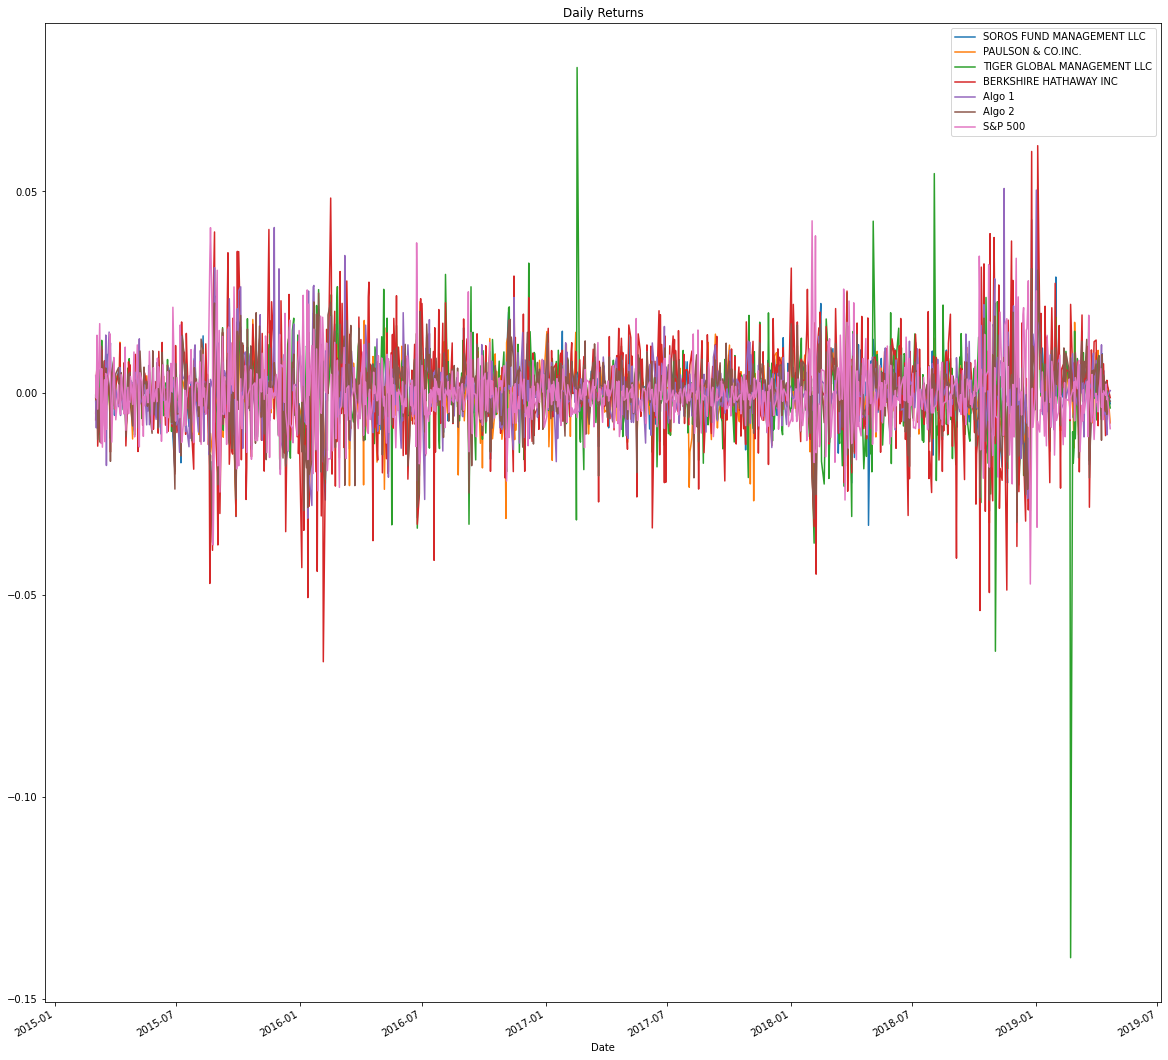

In [20]:
# Plot daily returns of all portfolios

#joined_data_rows_daily = (joined_data_rows - joined_data_rows.shift(1)) / joined_data_rows.shift(1)
#joined_data_rows_daily
joined_data_rows.plot(figsize=(20,20), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

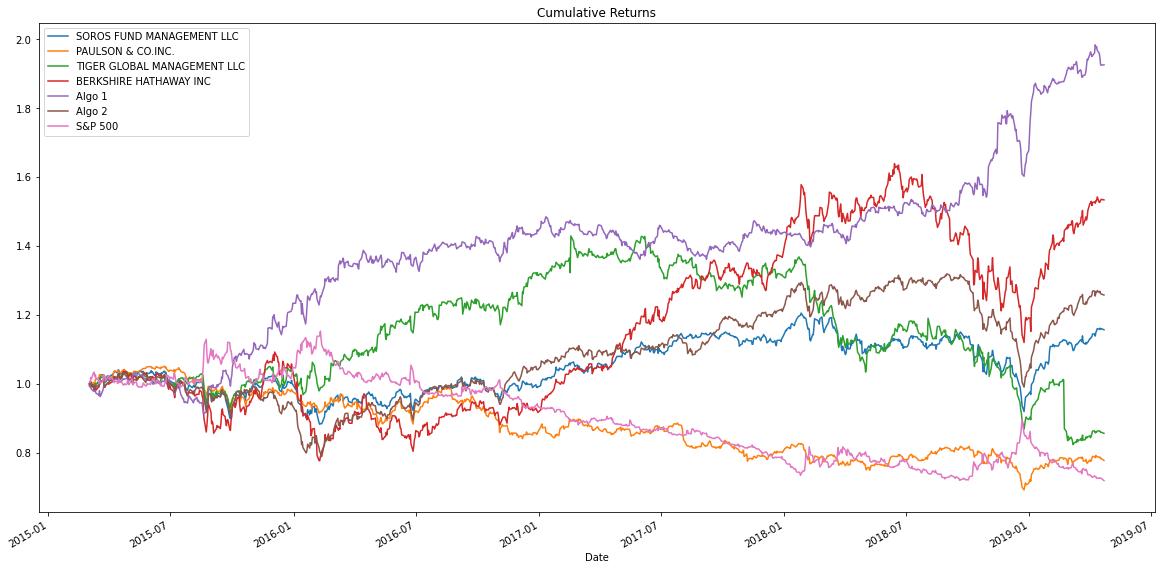

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_rows).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

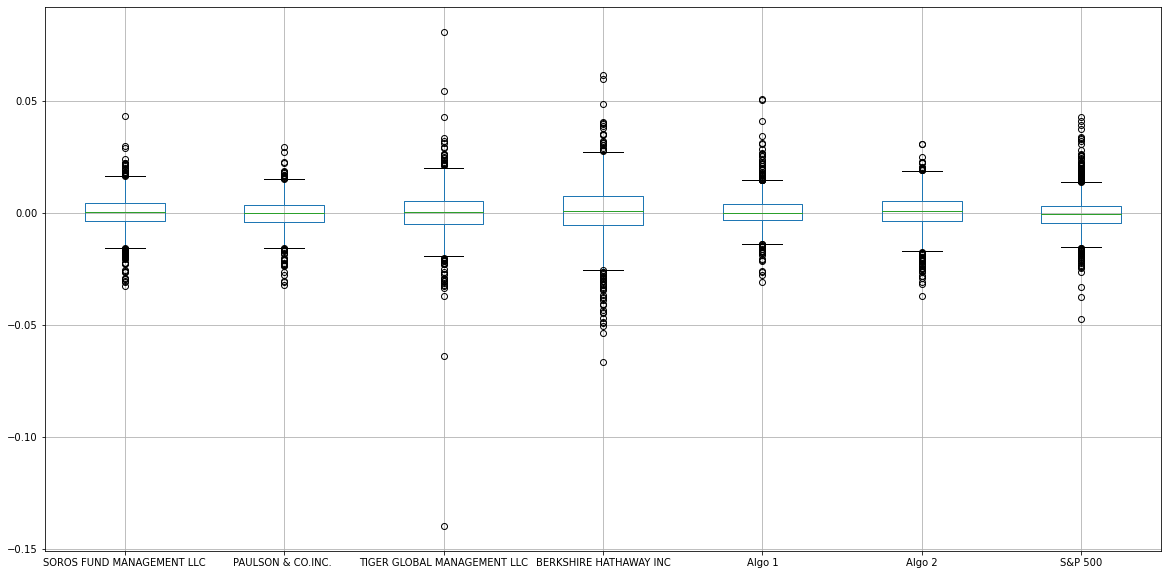

In [22]:
# Box plot to visually show risk
joined_data_rows.boxplot(figsize=(20,10))

### Calculate Standard Deviations

<AxesSubplot:>

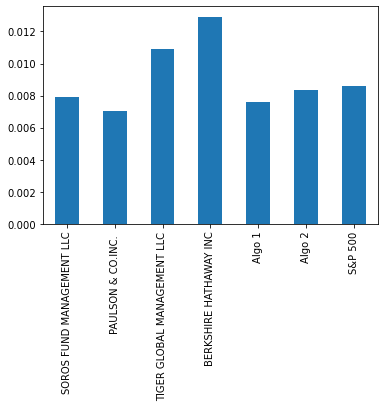

In [23]:
# Calculate the daily standard deviations of all portfolios
joined_data_rows.std().plot.bar()

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
#snp_daily_returns_copy.std()


# Determine which portfolios are riskier than the S&P 500
joined_data_rows.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annual_volatility = joined_data_rows.std()*np.sqrt(252)
annual_volatility.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of all Portfolios'}, xlabel='Date'>

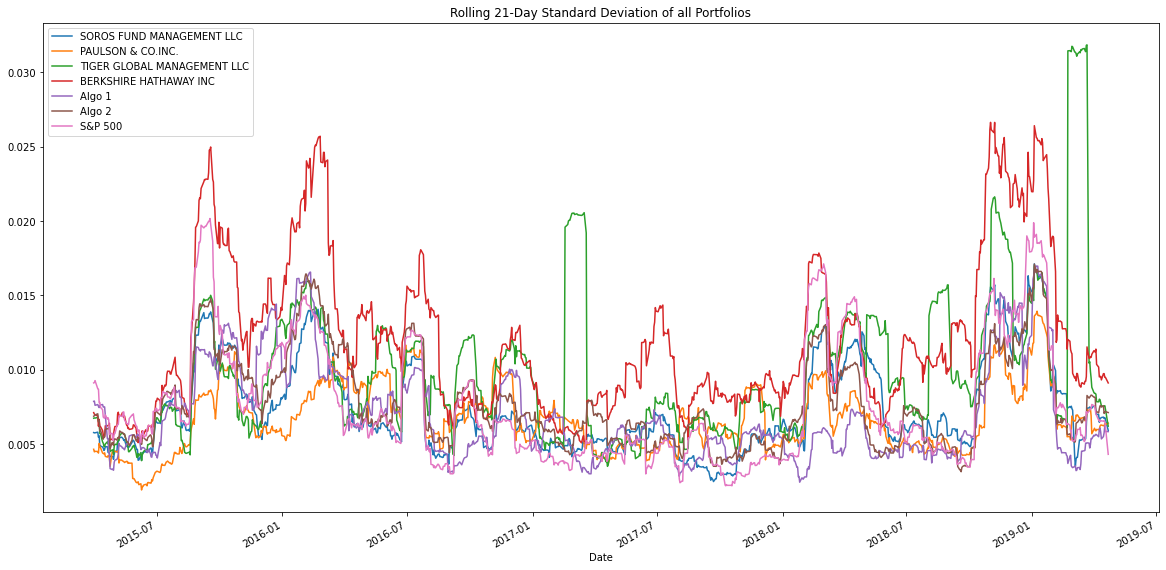

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_data_rows.rolling(21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation of all Portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

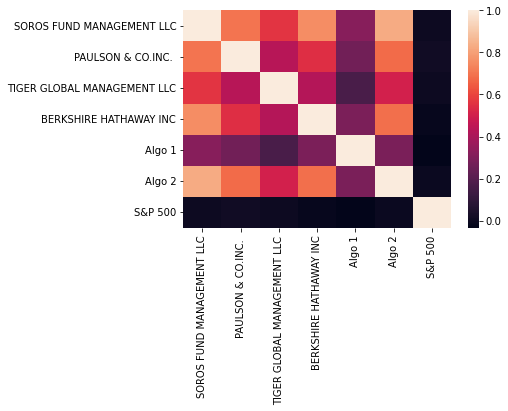

In [27]:
# Calculate the correlation
joined_data_corr = joined_data_rows.corr()

# Display de correlation matrix
sns.heatmap(joined_data_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

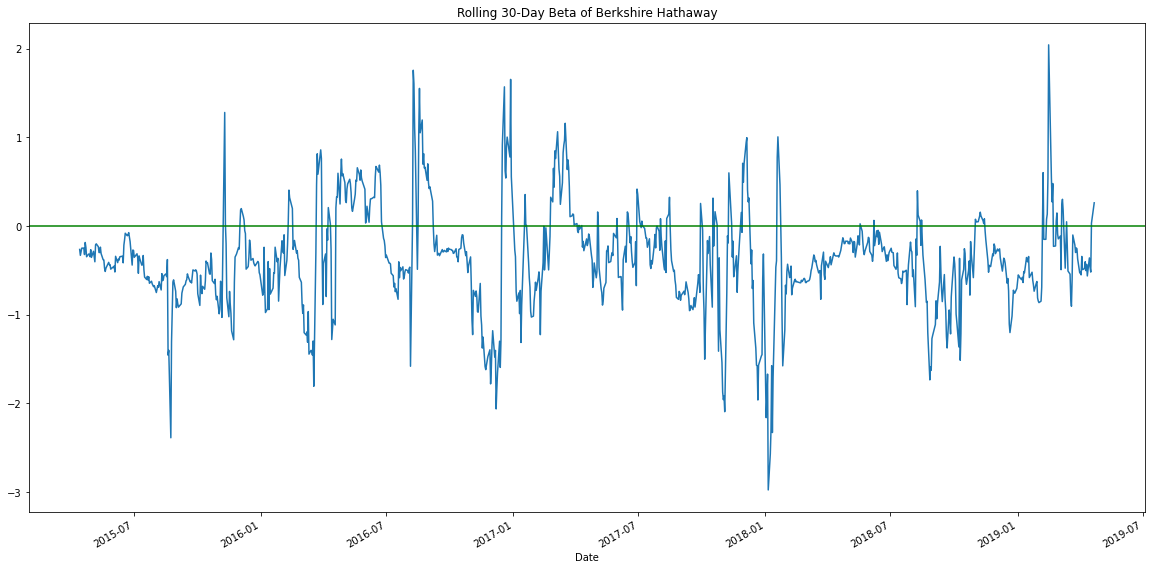

In [28]:
# Calculate covariance of a single portfolio
berkshire_covariance=joined_data_rows['BERKSHIRE HATHAWAY INC'].cov(joined_data_rows['S&P 500'])
berkshire_covariance

# Calculate variance of S&P 500
snp_variance = joined_data_rows['S&P 500'].var()
snp_variance

# Computing beta
beta = berkshire_covariance / snp_variance
beta

# Plot beta trend
rolling_berkshire_covariance=joined_data_rows['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(cumulative_returns['S&P 500'])
rolling_berkshire_covariance

rolling_snp_variance = joined_data_rows['S&P 500'].rolling(window=30).var()
rolling_snp_variance

rolling_beta=rolling_berkshire_covariance / rolling_snp_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 30-Day Beta of Berkshire Hathaway').axhline(0,c='g')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Rolling 21-Day Exponentially Weight Avg of Berkshire Hathaway'}, xlabel='Date'>

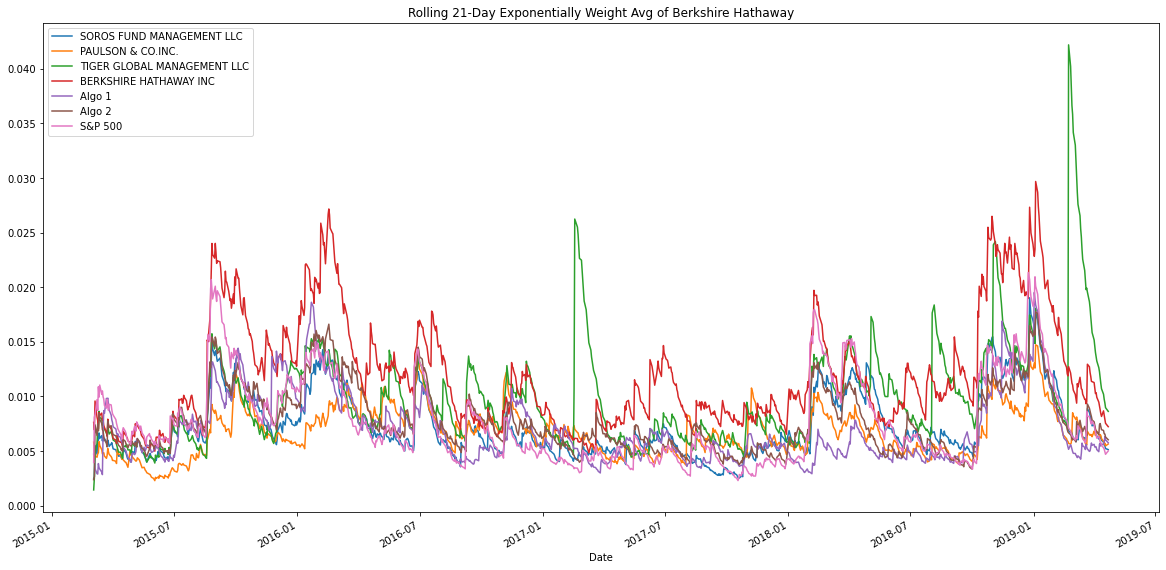

In [31]:
# Use `ewm` to calculate the rolling window
berkshire_exp_weight_avg = joined_data_rows.ewm(span=21).std()
berkshire_exp_weight_avg.plot(figsize=(20,10), title='Rolling 21-Day Exponentially Weight Avg of Berkshire Hathaway')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data_rows.mean()-joined_data_rows['S&P 500'].mean()) * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.953767
Algo 2                         1.018189
BERKSHIRE HATHAWAY INC         0.951436
SOROS FUND MANAGEMENT LLC      0.906838
TIGER GLOBAL MANAGEMENT LLC    0.278448
PAULSON & CO.INC.              0.142411
S&P 500                        0.000000
dtype: float64

<AxesSubplot:>

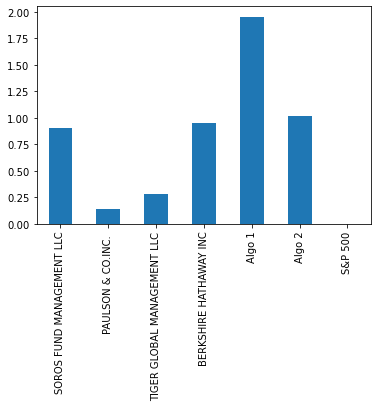

In [33]:
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!  

# Yes, the algorithmic strategies outperform the S&P500 and the whales portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock
AAPL = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(AAPL, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.drop(columns=['Symbol'], inplace=True)
columns = ["AAPL"]
aapl_df.columns = columns
aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [35]:
# Reading data from 2nd stock
COST = Path("../Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv(COST, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.drop(columns=['Symbol'], inplace=True)
columns = ["COST"]
cost_df.columns = columns
cost_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [36]:
# Reading data from 3rd stock
GOOG = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(GOOG, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.drop(columns=['Symbol'], inplace=True)
columns = ["GOOG"]
goog_df.columns = columns
goog_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [37]:
# Combine all stocks in a single DataFrame
Combined_df2 = pd.concat((aapl_df, cost_df, goog_df), axis="columns", join="inner")
Combined_df2.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [38]:
# Reset Date index


In [39]:
# Reorganize portfolio data by having a column per symbol


In [40]:
# Calculate daily returns
Combined_df2_daily_returns = Combined_df2.pct_change()


                                # Drop NAs



# Display sample data
Combined_df2_daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_custom = Combined_df2_daily_returns.dot(weights)
portfolio_returns_custom = portfolio_returns_custom.rename("Custom")

# Display sample data
portfolio_returns_custom.head()


Trade DATE
2019-05-09         NaN
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
joined_custom_df=pd.concat([joined_data_rows, portfolio_returns_custom], axis="columns", join="inner")
joined_custom_df.sort_index(ascending = True, inplace = True)
joined_custom_df = joined_custom_df.drop_duplicates().copy()
joined_custom_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.001148


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_custom_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.001148


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annual_volatility_all = joined_custom_df.std()*np.sqrt(252)
annual_volatility_all.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.246819
TIGER GLOBAL MANAGEMENT LLC    0.232434
Custom                         0.213137
S&P 500                        0.152147
SOROS FUND MANAGEMENT LLC      0.146589
Algo 2                         0.139204
Algo 1                         0.133645
PAULSON & CO.INC.              0.116683
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolios incl AAPL, GOOG and COST'}>

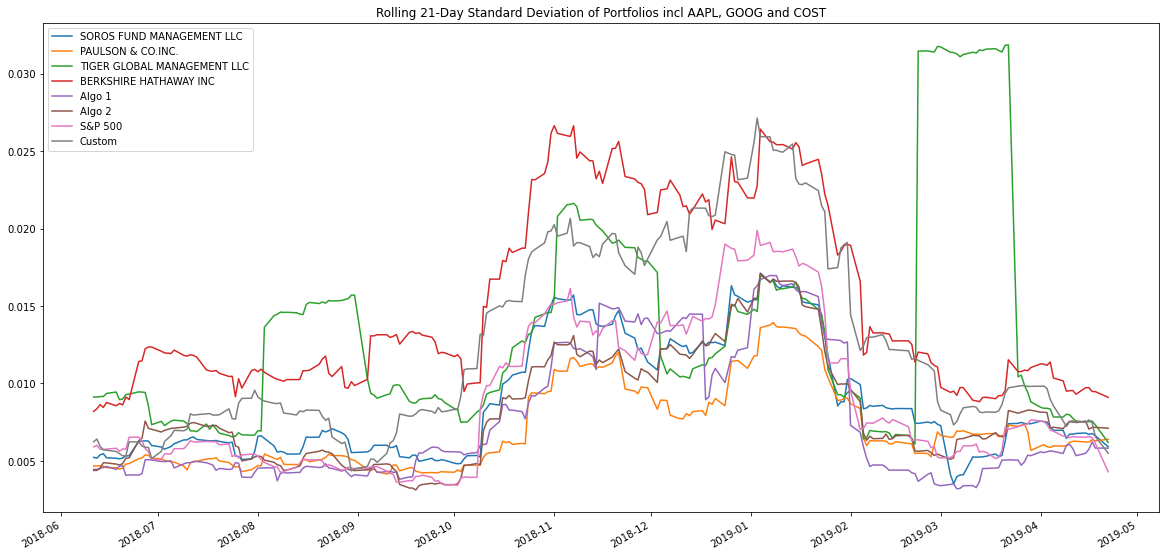

In [48]:
# Calculate rolling standard deviation
rolling_std_all = joined_custom_df.rolling(21).std()

# Plot rolling standard deviation
rolling_std_all.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation of Portfolios incl AAPL, GOOG and COST')

### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
joined_correlation = joined_custom_df.corr()
joined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.061503
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.025680
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.036047
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.006755
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.073296
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.039910
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.869976
Custom,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,0.869976,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

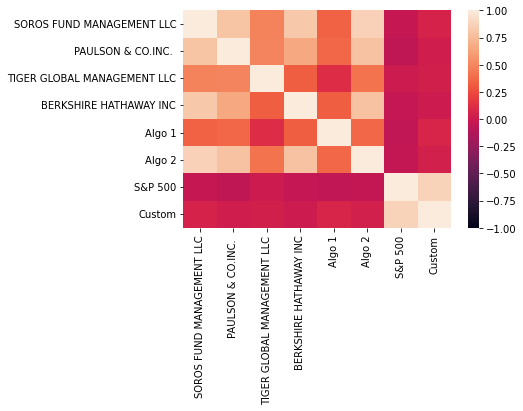

In [50]:
# Calculate and plot Beta
sns.heatmap(joined_correlation, vmin=-1, vmax=1)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = ((joined_custom_df.mean()-joined_custom_df['S&P 500'].mean()) * 252) / (joined_custom_df.std() * np.sqrt(252))
sharpe_ratios_all

SOROS FUND MANAGEMENT LLC      0.794123
PAULSON & CO.INC.              0.800566
TIGER GLOBAL MANAGEMENT LLC   -0.768854
BERKSHIRE HATHAWAY INC         0.351883
Algo 1                         2.492744
Algo 2                         0.482663
S&P 500                        0.000000
Custom                        -0.304494
dtype: float64

<AxesSubplot:>

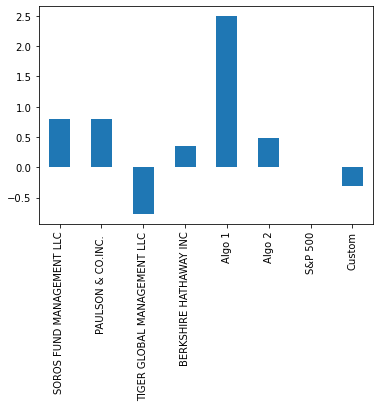

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot.bar()

### How does your portfolio do?

Write your answer here!